Lab 4 - Linear models
We focus on models in the form

In [82]:
import cmdstanpy
cmdstanpy.install_cmdstan()
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd



Installing CmdStan version: 2.31.0
Install directory: /root/.cmdstan
CmdStan version 2.31.0 already installed


In [83]:
import seaborn as sns

Excercise 1 - modelling height of !Kung people
Normal model - no predictors


In [84]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
print(d.head())
print(d.mean())
print(d.std())

    height     weight   age  male
0  151.765  47.825606  63.0     1
1  139.700  36.485807  63.0     0
2  136.525  31.864838  65.0     0
3  156.845  53.041914  41.0     1
4  145.415  41.276872  51.0     0
height    154.597093
weight     44.990486
age        41.138494
male        0.468750
dtype: float64
height     7.742332
weight     6.456708
age       15.967855
male       0.499733
dtype: float64


Task 1. Prior predictive checks

In [85]:
model_ppc=CmdStanModel(stan_file='height_1_ppc.stan')

R = 1000
sim=model_ppc.sample(data={"a":154.597093, "b":7.742332},
                     iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

DEBUG:cmdstanpy:found newer exe file, not recompiling
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxtew51h_/4jlahyt0.json
DEBUG:cmdstanpy:cmd: /content/height_1_ppc info
cwd: None
14:12:44 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_1_ppc', 'id=1', 'random', 'seed=29042020', 'data', 'file=/tmp/tmpxtew51h_/4jlahyt0.json', 'output', 'file=/tmp/tmpxtew51h_/height_1_ppcnupcn7sy/height_1_ppc-20230414141244.csv', 'refresh=1000', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']


14:12:44 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=1, chain_ids=[1], num_processes=1
 cmd (chain 1):
	['/content/height_1_ppc', 'id=1', 'random', 'seed=29042020', 'data', 'file=/tmp/tmpxtew51h_/4jlahyt0.json', 'output', 'file=/tmp/tmpxtew51h_/height_1_ppcnupcn7sy/height_1_ppc-20230414141244.csv', 'refresh=1000', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']
 retcodes=[0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpxtew51h_/height_1_ppcnupcn7sy/height_1_ppc-20230414141244.csv
 console_msgs (if any):
	/tmp/tmpxtew51h_/height_1_ppcnupcn7sy/height_1_ppc-20230414141244_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 0
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.800000

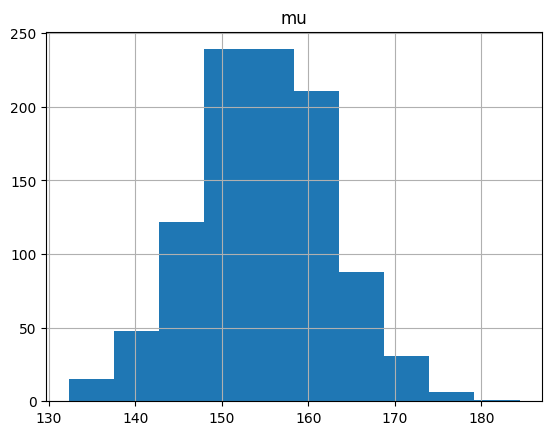

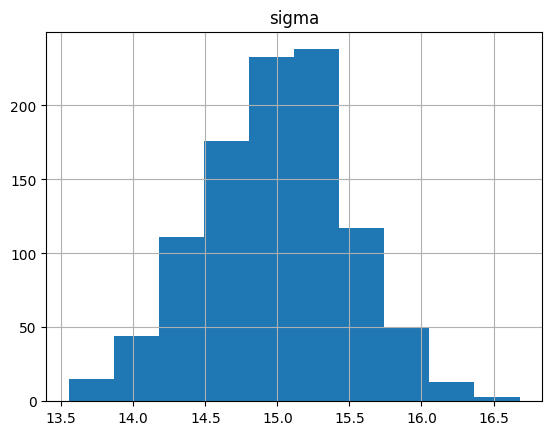

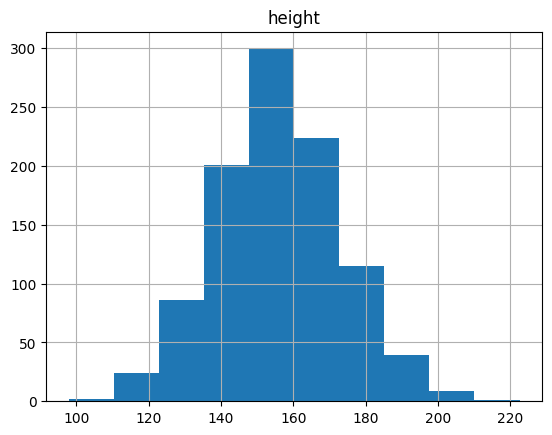

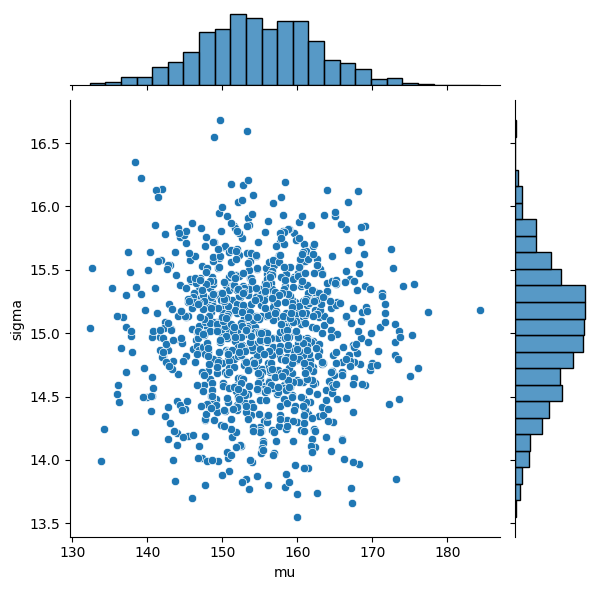

           height      weight         age        male
count  352.000000  352.000000  352.000000  352.000000
mean   154.597093   44.990486   41.138494    0.468750
std      7.742332    6.456708   15.967855    0.499733
min    136.525000   31.071052   18.000000    0.000000
25%    148.590000   40.256290   28.000000    0.000000
50%    154.305000   44.792210   39.000000    0.000000
75%    160.655000   49.292693   51.000000    1.000000
max    179.070000   62.992589   88.000000    1.000000
         lp__  accept_stat__           mu        sigma       height
count  1000.0         1000.0  1000.000000  1000.000000  1000.000000
mean      0.0            0.0   154.894001    14.990923   155.936476
std       0.0            0.0     7.845494     0.503213    17.239139
min       0.0            0.0   132.297000    13.551300    97.839500
25%       0.0            0.0   149.612000    14.648125   143.970000
50%       0.0            0.0   154.769000    15.011050   155.964500
75%       0.0            0.0   160.312

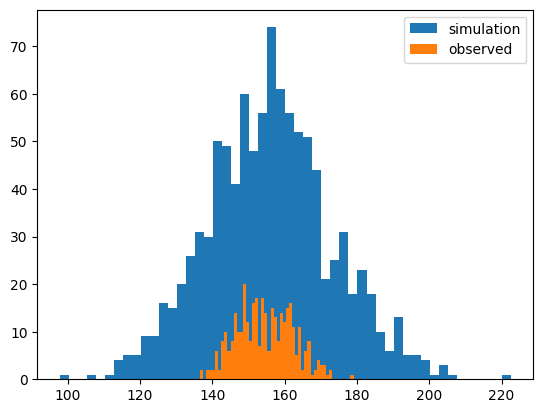

In [86]:
df = sim.draws_pd()
df.hist(column='mu')
df.hist(column='sigma')
df.hist(column='height')
plt.show()

sns.jointplot(data=df, x="mu", y="sigma")
plt.show()

print(d.describe())

print(df.describe())

plt.hist(df['height'], label = 'simulation', bins=50)
plt.hist(d['height'], label = 'observed', bins=50)
plt.legend()
plt.show()

Task 2. Model fit and evaluation

In [87]:
model_1_fit=CmdStanModel(stan_file='height_1_fit.stan')

DEBUG:cmdstanpy:found newer exe file, not recompiling


In [88]:
fit=model_1_fit.sample(data=dict(N=len(d),
                                   heights=d.height.values),
                         seed=28052020)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxtew51h_/gm9ntg5r.json
DEBUG:cmdstanpy:cmd: /content/height_1_fit info
cwd: None
14:12:47 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_1_fit', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmpxtew51h_/gm9ntg5r.json', 'output', 'file=/tmp/tmpxtew51h_/height_1_fitthi5cxh9/height_1_fit-20230414141247_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_1_fit', 'id=2', 'random', 'seed=28052020', 'data', 'file=/tmp/tmpxtew51h_/gm9ntg5r.json', 'output', 'file=/tmp/tmpxtew51h_/height_1_fitthi5cxh9/height_1_fit-20230414141247_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_1_fit', 'id=3', 'random', 'seed=28052020', 'data', 'file=/tmp/tmpxtew51h_/gm9ntg5r.json', 'output', 'file=/tmp/tmpxtew51h_/height_1_fitthi5cxh9/height_1_fit-20230414141247_3.

14:12:48 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/height_1_fit', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmpxtew51h_/gm9ntg5r.json', 'output', 'file=/tmp/tmpxtew51h_/height_1_fitthi5cxh9/height_1_fit-20230414141247_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpxtew51h_/height_1_fitthi5cxh9/height_1_fit-20230414141247_1.csv
 console_msgs (if any):
	/tmp/tmpxtew51h_/height_1_fitthi5cxh9/height_1_fit-20230414141247_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.800000000

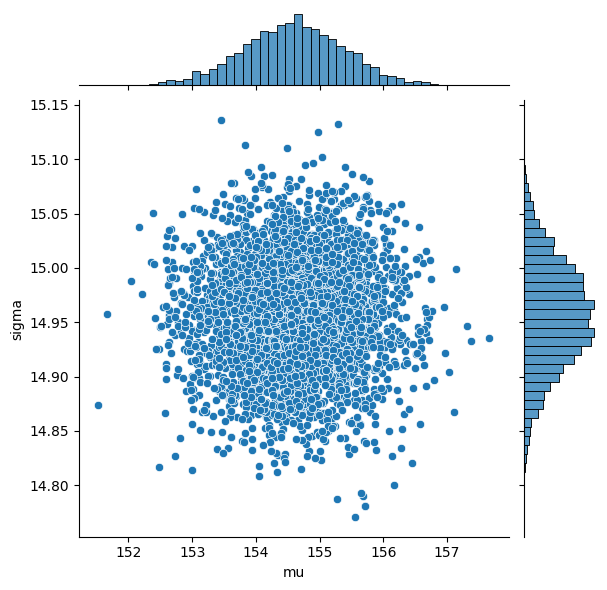

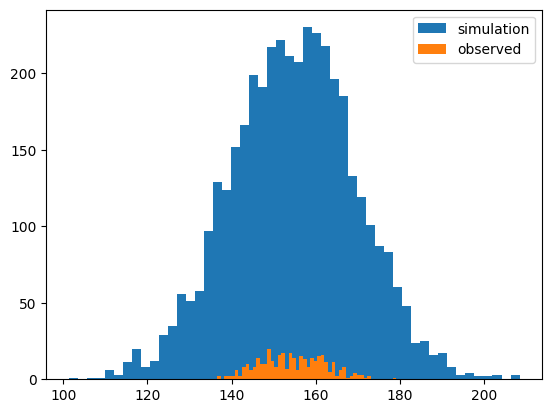

In [89]:
df = fit.draws_pd()
sns.jointplot(data=df, x="mu", y="sigma")
plt.show()

plt.hist(df['height'], label = 'simulation', bins=50)
plt.hist(d['height'], label = 'observed', bins=50)
plt.legend()
plt.show()

Task 3. Adding predictor to the model - weight

In [90]:
d['c_weight'] = d.weight / d.weight.mean()
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}

Task 4. Prior predictive checks

In [91]:
model_ppc=CmdStanModel(stan_file='height_2a_ppc.stan')
R = 1000
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

DEBUG:cmdstanpy:Removing /content/height_2a_ppc
14:12:49 - cmdstanpy - INFO - compiling stan file /content/height_2a_ppc.stan to exe file /content/height_2a_ppc
INFO:cmdstanpy:compiling stan file /content/height_2a_ppc.stan to exe file /content/height_2a_ppc
DEBUG:cmdstanpy:cmd: make /content/height_2a_ppc
cwd: /root/.cmdstan/cmdstan-2.31.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc  --o=/content/height_2a_ppc.hpp /content/height_2a_ppc.stan

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.78.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -Wno-ignored-attributes   -x

chain 1 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2a_ppc', 'id=1', 'random', 'seed=29042020', 'data', 'file=/tmp/tmpxtew51h_/g6agns4i.json', 'output', 'file=/tmp/tmpxtew51h_/height_2a_ppc9x67fy7j/height_2a_ppc-20230414141301.csv', 'refresh=1000', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']


14:13:01 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=1, chain_ids=[1], num_processes=1
 cmd (chain 1):
	['/content/height_2a_ppc', 'id=1', 'random', 'seed=29042020', 'data', 'file=/tmp/tmpxtew51h_/g6agns4i.json', 'output', 'file=/tmp/tmpxtew51h_/height_2a_ppc9x67fy7j/height_2a_ppc-20230414141301.csv', 'refresh=1000', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']
 retcodes=[0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpxtew51h_/height_2a_ppc9x67fy7j/height_2a_ppc-20230414141301.csv
 console_msgs (if any):
	/tmp/tmpxtew51h_/height_2a_ppc9x67fy7j/height_2a_ppc-20230414141301_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 0
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0

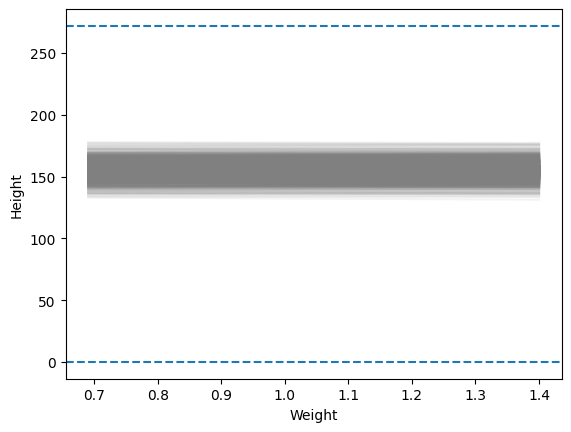

In [92]:
sim_pd = sim.draws_pd()
alfa_samples = sim_pd.alfa.values
beta_samples = sim_pd.beta.values

for i in range(len(alfa_samples)):
    plt.plot(data_sim["weight"], alfa_samples[i] + beta_samples[i] * data_sim["weight"], color="gray", alpha=0.1)

plt.axhline(y=0, ls="--"), plt.axhline(y=272, ls="--")
plt.xlabel("Weight"), plt.ylabel("Height")
plt.show()

Task 5. Modifying prior
If prior for beta admits negative values, then it makes no sense. Lets change prior to lognormal distribution.

In [93]:
model_ppc=CmdStanModel(stan_file='height_2b_ppc.stan')

DEBUG:cmdstanpy:found newer exe file, not recompiling


In [94]:
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxtew51h_/4cykatio.json
DEBUG:cmdstanpy:cmd: /content/height_2b_ppc info
cwd: None
14:13:02 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2b_ppc', 'id=1', 'random', 'seed=29042020', 'data', 'file=/tmp/tmpxtew51h_/4cykatio.json', 'output', 'file=/tmp/tmpxtew51h_/height_2b_ppcpyditf54/height_2b_ppc-20230414141302.csv', 'refresh=1000', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']


14:13:03 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=1, chain_ids=[1], num_processes=1
 cmd (chain 1):
	['/content/height_2b_ppc', 'id=1', 'random', 'seed=29042020', 'data', 'file=/tmp/tmpxtew51h_/4cykatio.json', 'output', 'file=/tmp/tmpxtew51h_/height_2b_ppcpyditf54/height_2b_ppc-20230414141302.csv', 'refresh=1000', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']
 retcodes=[0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpxtew51h_/height_2b_ppcpyditf54/height_2b_ppc-20230414141302.csv
 console_msgs (if any):
	/tmp/tmpxtew51h_/height_2b_ppcpyditf54/height_2b_ppc-20230414141302_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 0
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0

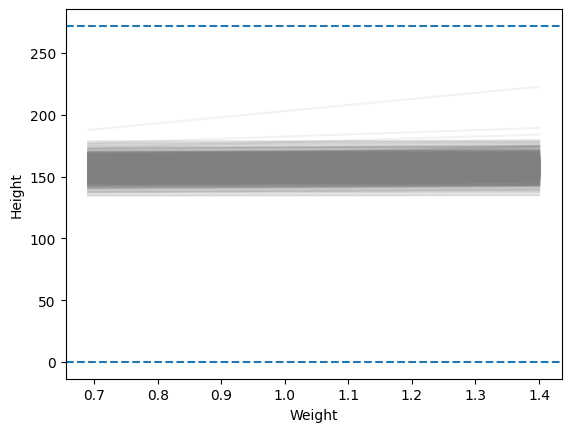

In [95]:
sim_pd = sim.draws_pd()
alfa_samples = sim_pd.alfa.values
beta_samples = sim_pd.beta.values

for i in range(len(alfa_samples)):
    plt.plot(data_sim["weight"], alfa_samples[i] + beta_samples[i] * data_sim["weight"], color="gray", alpha=0.1)

plt.axhline(y=0, ls="--"), plt.axhline(y=272, ls="--")
plt.xlabel("Weight"), plt.ylabel("Height")
plt.show()


Task 6. Fitting and evaluating model

In [96]:
model_2_fit=CmdStanModel(stan_file='height_2_fit.stan')

DEBUG:cmdstanpy:found newer exe file, not recompiling


In [98]:
data_fit={'N':50, 'heights': d.height[:50], 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}
fit=model_2_fit.sample(data=data_fit,seed=28052020)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxtew51h_/y8ned87k.json
DEBUG:cmdstanpy:cmd: /content/height_2_fit info
cwd: None
14:13:49 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmpxtew51h_/y8ned87k.json', 'output', 'file=/tmp/tmpxtew51h_/height_2_fitqdsol0uf/height_2_fit-20230414141349_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=2', 'random', 'seed=28052020', 'data', 'file=/tmp/tmpxtew51h_/y8ned87k.json', 'output', 'file=/tmp/tmpxtew51h_/height_2_fitqdsol0uf/height_2_fit-20230414141349_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/height_2_fit', 'id=3', 'random', 'seed=28052020', 'data', 'file=/tmp/tmpxtew51h_/y8ned87k.json', 'output', 'file=/tmp/tmpxtew51h_/height_2_fitqdsol0uf/height_2_fit-20230414141349_3.

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: lognormal_lpdf: Random variable is -0.250665, but must be nonnegative! (in '/content/height_2_fit.stan', line 22, column 3 to column 26)
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: lognormal_lpdf: Random variable is -0.473824, but must be nonnegative! (in '/content/height_2_fit.stan', line 22, column 3 to column 26)
If this warning occurs sporadically, such as for highly constrained va